In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("emotion-text-dataset/emotion_dataset.csv")
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [3]:
# drop "shame" to uniform the labels
df = df[df["Emotion"] != "shame"]

In [4]:
df["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
Name: Emotion, dtype: int64

In [5]:
# making the labeling same as the speech
emotion_to_id_convert = {
    "surprise": 0,
    "neutral": 1,
    "joy": 2,
    "sadness": 3,
    "anger": 4,
    "fear": 5,
    "disgust": 6
}

emotions_dict = {
    0: 'surprised',
    1: 'neutral',
    2: 'happy',
    3: 'sad',
    4: 'angry',
    5: 'fearful',
    6: 'disgust'
}

In [6]:
df["Emotion_uniform"] = df["Emotion"].apply(lambda x: emotion_to_id_convert[x])
df.head()

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_37330/4020174303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Emotion_uniform"] = df["Emotion"].apply(lambda x: emotion_to_id_convert[x])


,Unnamed: 0,Emotion,Text,Clean_Text,Emotion_uniform
0,0,neutral,Why ?,NaN,1
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,2
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,3
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,2
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,2


In [7]:
df.drop(["Unnamed: 0", "Clean_Text", "Emotion"], axis=1, inplace=True)

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_37330/3318117705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Unnamed: 0", "Clean_Text", "Emotion"], axis=1, inplace=True)


In [8]:
df

,Text,Emotion_uniform
0,Why ?,1
1,Sage Act upgrade on my to do list for tommorow.,2
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,3
3,Such an eye ! The true hazel eye-and so brill...,2
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,2
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,0
34788,The world didnt give it to me..so the world MO...,2
34789,A man robbed me today .,4
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",5


# Map Text to Embedding Dimension

In [9]:
from tqdm.notebook import tqdm
import tensorflow_hub as hub

tqdm.pandas()

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.95, min_df=5)

In [48]:
y = df["Emotion_uniform"]

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_val, y_train, y_val = train_test_split(df["Text"], y, random_state=3407, test_size=0.2, stratify=y)

In [51]:
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)

In [52]:
# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
# use_model = hub.load(module_url)
# X_train = use_model(X_train).numpy()
# X_val = use_model(X_val).numpy()

In [53]:
X_train.shape

(27716, 19023)

Check if y label is distributed correctly

In [54]:
y_train.value_counts().sort_index()

0    3250
1    1803
2    8836
3    5377
4    3437
5    4328
6     685
Name: Emotion_uniform, dtype: int64

In [55]:
y_val.value_counts().sort_index()

0     812
1     451
2    2209
3    1345
4     860
5    1082
6     171
Name: Emotion_uniform, dtype: int64

In [56]:
import torch
from torch.utils.data import Dataset, DataLoader

In [57]:
from utils import torch_device_seed, check_gpu, clear_device_cache

In [58]:
np.random.seed(3407)
torch.manual_seed(3407)
torch_device_seed(3407)

In [59]:
y_val.to_numpy()

array([2, 2, 4, ..., 3, 2, 2])

In [87]:
class EmotionDataset(Dataset):
    def __init__(self, data, labels=None):
        # labels none for test data that doesn't have labels
        self.data = data.toarray().astype(np.float32)
        self.labels = labels.to_numpy() if labels is not None else np.zeros(data.shape[0])


    def __len__(self):
        return self.data.shape[0]


    def __getitem__(self, index):
        return self.data[index], self.labels[index]

In [88]:
train_ds = EmotionDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)

val_ds = EmotionDataset(X_val, y_val)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False)

In [89]:
for x in train_loader:
    print(x[0].shape)
    break

torch.Size([16, 19023])


# Modelling

In [90]:
import gc
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [91]:
device = check_gpu()

In [92]:
device

device(type='mps')

In [93]:
class SimpleLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearModel, self).__init__()

        self.linear1 = nn.Linear(input_size, 128)
        self.linear2 = nn.Linear(128, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.linear3 = nn.Linear(64, output_size)


    def forward(self, inputs):
        # we assume the inputs already in embedding dimension
        output = F.relu(self.linear1(inputs))
        output = F.relu(self.linear2(output))
        output = self.dropout1(output)
        output = F.softmax(self.linear3(output), dim=1)

        return output

In [94]:
linear_model = SimpleLinearModel(input_size=X_train.shape[1], output_size=len(emotions_dict)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001, weight_decay=1e-5)

In [95]:
EPOCHS = 20

In [96]:
def fit(model, criterion, optimizer, epochs=EPOCHS):
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []

    for epoch in range(epochs):  # Loop over the dataset multiple times
        running_loss = 0.0
        total = 0
        correct = 0
        model.train()
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
    
            optimizer.zero_grad()
    
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item() 

            _, predicted = torch.max(outputs.data, axis=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
        # get train loss and accuracy
        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
    
        # get test loss and accuracy
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            model.eval()
            for data in val_loader:
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, axis=1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch}: train_loss: {train_loss:.4f}; train_accuracy: {train_accuracy:.4f}; val_loss: {val_loss:.4f}; val_accuracy: {val_accuracy:.4f}")

    return {
        "train_loss": train_losses,
        "train_accuracy": train_accuracies,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }

In [97]:
clear_device_cache()

In [98]:
linear_model_result = fit(linear_model, criterion, optimizer, epochs=EPOCHS)

Epoch 0: train_loss: 0.0800; train_accuracy: 0.5457; val_loss: 1.0244; val_accuracy: 0.6416
Epoch 1: train_loss: 0.0445; train_accuracy: 0.7626; val_loss: 1.0563; val_accuracy: 0.6468
Epoch 2: train_loss: 0.0234; train_accuracy: 0.8798; val_loss: 1.2874; val_accuracy: 0.6411
Epoch 3: train_loss: 0.0113; train_accuracy: 0.9483; val_loss: 1.6207; val_accuracy: 0.6395
Epoch 4: train_loss: 0.0065; train_accuracy: 0.9723; val_loss: 1.8762; val_accuracy: 0.6306
Epoch 5: train_loss: 0.0054; train_accuracy: 0.9774; val_loss: 2.1013; val_accuracy: 0.6257
Epoch 6: train_loss: 0.0047; train_accuracy: 0.9802; val_loss: 2.1532; val_accuracy: 0.6299
Epoch 7: train_loss: 0.0042; train_accuracy: 0.9808; val_loss: 2.1666; val_accuracy: 0.6312
Epoch 8: train_loss: 0.0046; train_accuracy: 0.9806; val_loss: 2.2342; val_accuracy: 0.6335
Epoch 9: train_loss: 0.0034; train_accuracy: 0.9853; val_loss: 2.3690; val_accuracy: 0.6296
Epoch 10: train_loss: 0.0036; train_accuracy: 0.9834; val_loss: 2.2712; val_accu

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

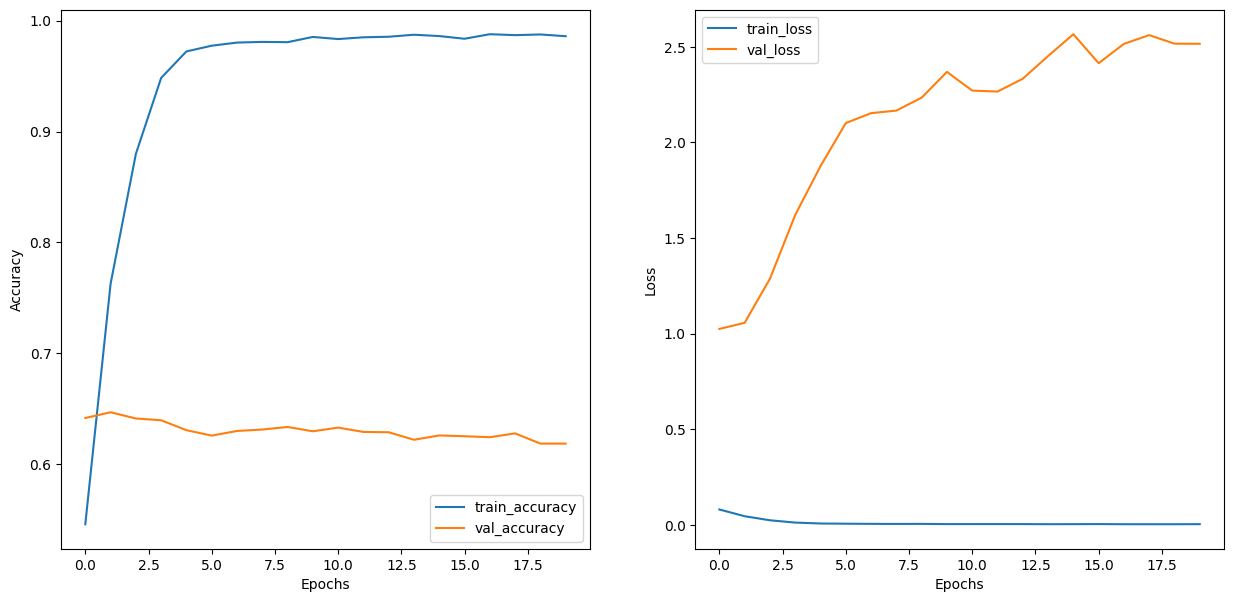

In [100]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(linear_model_result["train_accuracy"], label="train_accuracy")
plt.plot(linear_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(linear_model_result["train_loss"], label="train_loss")
plt.plot(linear_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [105]:
def predict_one(model, text, label=None):
    # text_embedding = use_model([text]).numpy()
    text_embedding = vectorizer.transform([text]).toarray().astype(np.float32)

    outputs = model(torch.tensor(text_embedding).to(device))
    _, predicted = torch.max(outputs.data, axis=1)

    predicted = predicted.cpu().numpy()

    print("Detected Emotion :", emotions_dict[predicted[0]])
    if label is not None:
        print("Actual Emotion:", emotions_dict[label])

In [106]:
predict_one(linear_model, "I hate this country")

Detected Emotion : angry


In [107]:
val_data_test = np.random.choice(y_val.index)
test_sample = df.loc[val_data_test]
test_sample

Text                Even those . It'll be very romantic , I think...
Emotion_uniform                                                    2
Name: 1830, dtype: object

In [108]:
predict_one(linear_model, test_sample["Text"], test_sample["Emotion_uniform"])

Detected Emotion : happy
Actual Emotion: happy
